## Shopify Fall 2021 Data Science Challenge
**Q1) a] Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

In [111]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [112]:
#creating my dataframe
s_df = pd.read_csv("shopify_data.csv")
s_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [113]:
#getting a summary for my dataset
s_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


We can see here where the 3145 value came from below.

In [114]:
#creating a summary for our target column
s_df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

We have a high standard deviation value which means the values are far from the mean and not distributed normally. Which indicates the presence of extreme values in the data, hence taking the mean as the metric would be very inaccurate.

Another thing to note that my min and max values vary significantly which confirms the presence of outliers in the data.


In [115]:
#checking for any empty values
s_df.order_amount.isnull().sum()

0

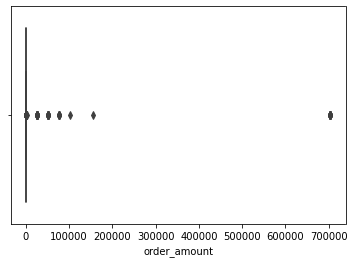

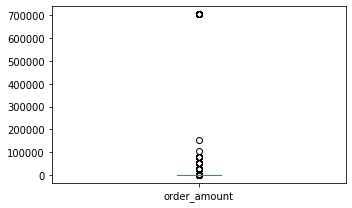

In [116]:
#visualizing my target column by creating boxplots using seaborn and matplotlib
sns.boxplot(x=s_df['order_amount'])
plt.show()
s_df['order_amount'].plot.box(figsize=(5,3))
plt.tight_layout()
plt.show()

As expected from the visualizations above, there are a lot of outliers in the data that are influencing the inaccurate representation of the mean metric.

We can use the z-score and IQR method to detect and treat the outliers.

In [117]:
#using the z-score approach to identify my outliers
mean = np.mean(s_df.order_amount)
std = np.std(s_df.order_amount)
threshold = 3
outlier = []
for i in s_df.order_amount:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [704000, 704000, 704000, 154350, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000]


We can see here 704000 and 154350 are the values of our interest in the data that
are causing the fluctuations in the mean value.

In [118]:
#using the IRQ method to treat the outliers
Q1 = s_df['order_amount'].quantile(0.25)
Q2 = s_df['order_amount'].quantile(0.5)
Q3 = s_df['order_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1-1.5*IQR
upper_whisker = Q3+1.5*IQR
filtered_df= s_df[(s_df.order_amount > Q2-1.5*IQR) & (s_df.order_amount < Q2+1.5*IQR)]

This distribution is a lot more clear and accurate, I scaled a bit to have a more accurate representation of the boxplot.

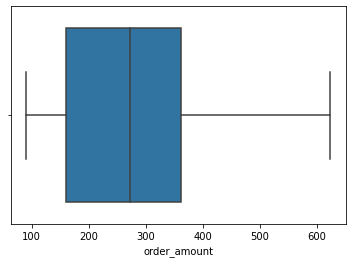

In [119]:
#now visualizing my new boxplot dataframe

sns.boxplot(x=filtered_df['order_amount'])
plt.show()


**What metric would you report for this dataset?**

I would use the median since it is a better representation of the data when there are outliers present in the data, and we have extreme outliers here hence we cannot use the mean.

**What is its value?**

From below, the metric we are using is the median so our value is **272.00$**.

In [120]:
filtered_df.order_amount.describe()




count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

**Q2) a]**

**How many orders were shipped by Speedy Express in total?**
```SQL
SELECT COUNT(*) AS total_orders
FROM Orders
LEFT JOIN Shippers ON Orders.ShipperID=Shippers.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express';```

**Answer: 54**

**Q2) b]**

**What is the last name of the employee with the most orders?**

```SQL
SELECT Employees.LastName, Orders.OrderID AS total_orders
FROM Employees
LEFT JOIN Orders ON Employees.EmployeeID=Orders.EmployeeID
GROUP BY LastName
ORDER BY COUNT(total_orders) DESC
LIMIT 1;```

**Answer: Peacock**

**Q2) c]**

**What product was ordered the most by customers in Germany?**

```SQL
SELECT Products.ProductID, Products.ProductName, SUM(OrderDetails.Quantity) AS total_orders
FROM OrderDetails
LEFT JOIN Orders ON Orders.OrderID=OrderDetails.OrderID
LEFT JOIN Products ON OrderDetails.ProductID=Products.ProductID
LEFT JOIN Customers ON Orders.CustomerID=Customers.CustomerID
WHERE Customers.Country='Germany'
GROUP BY OrderDetails.ProductID
ORDER BY total_orders DESC
LIMIT 1;```

**Answer: Boston Crab Meat with 160 orders**